# Demo Deep Belief Network para identificar TIPOS de ANIMALES


0) Instalar paquete de DBN: 
( para más info ver https://github.com/albertbup/deep-belief-network/blob/master/README.md )

In [5]:
pip install git+git://github.com/albertbup/deep-belief-network.git

  Cloning git://github.com/albertbup/deep-belief-network.git to /tmp/pip-req-build-52qxvdz0
  Running command git clone -q git://github.com/albertbup/deep-belief-network.git /tmp/pip-req-build-52qxvdz0
  Created wheel for deep-belief-network: filename=deep_belief_network-1.0.3-cp36-none-any.whl size=13464 sha256=96453c2239bc0b9de77fcde05087fce327e7775d6f4d74456510376aba489c32
  Stored in directory: /tmp/pip-ephem-wheel-cache-gg8scgi1/wheels/29/6d/3b/6a50cf42a32bdfaa903b17832d60d8d3e5dc4b0fd02ae8acaf
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=447ace0ccef4a2acae1bf05d95b6077ad89b978196a20408f728141aac48c1ed
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built deep-belief-network gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


1) Cargar librerías:

In [6]:
# nota se debe indicar la versión 1 de TF para compatibilidad del código
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

from dbn.tensorflow import SupervisedDBNClassification
import numpy as np
import pandas as pd
from numpy.random import RandomState

from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

print ("Librerías cargadas.")

1.15.2
Librerías cargadas.


2) Configurar los datos cargados (se debe definir de acuerdo a los datos):

In [7]:
# define clases (ejemplo ANIMALES)
CLASSES = ['na', 'MAMIFERO', 'AVE', 'REPTIL', 'PEZ', 'ANFIBIO', 'INSECTO', 'INVERTEBRADO']

# define nombre atributo de CLASE (ejemplo ANIMALES)
ClassAttributeName = 'TIPO'

print("Configuración definida de ", ClassAttributeName, ": ", CLASSES)

Configuración definida de  TIPO :  ['na', 'MAMIFERO', 'AVE', 'REPTIL', 'PEZ', 'ANFIBIO', 'INSECTO', 'INVERTEBRADO']


3) Cargar CSV con datos a procesar y preparar datos para entrenar y probar (ya separados):

In [9]:
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demo ANIMALES'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [10]:
# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + '/datos/animales.csv')

df.head()

,TIENE_PELO,TIENE_PLUMAS,PONE_HUEVOS,DA_LECHE,ES_AEREO,ES_ACUATICO,ES_PREDADOR,TIENE_DIENTES,TIENE_COLUMNA,RESPIRA,ES_VENENOSO,TIENE_ALETAS,CANT_PATAS,TIENE_COLA,ES_DOMESTICO,TIPO
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [11]:
# separa al azar con proporción 80/20
rng = RandomState()

train = df.sample(frac=0.8, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

print("Datos Originales ", df.shape)
print("- Datos para Entrenar ", train.shape)
print("- Datos para Probar ", test.shape)

Datos Originales  (101, 16)
- Datos para Entrenar  (81, 16)
- Datos para Probar  (20, 16)


In [12]:
# define datos de entrada y salida para entrenamiento
X_train = np.array(train.drop([ClassAttributeName], axis=1))
Y_train = np.array(train[ClassAttributeName])

# define datos de entrada y salida para testing
X_test = np.array(test.drop([ClassAttributeName], axis=1))
Y_test = np.array(test[ClassAttributeName])

print("Datos Originales ", len(X_train)+len(X_test))
print("- Datos para Entrenar ", len(X_train))
print("- Datos para Probar ", len(X_test))

Datos Originales  101
- Datos para Entrenar  81
- Datos para Probar  20


4) Especificar el modelo para la DBN:

In [13]:
classifier = SupervisedDBNClassification(hidden_layers_structure = [256, 256],
learning_rate_rbm=0.05,
learning_rate=0.1,
n_epochs_rbm=20,
n_iter_backprop=200,
batch_size=32,
activation_function='relu',
dropout_p=0.2)

print(classifier)

SupervisedDBNClassification(batch_size=32, dropout_p=0.2, idx_to_label_map=None,
                            l2_regularization=1.0, label_to_idx_map=None,
                            learning_rate=0.1, n_iter_backprop=200,
                            verbose=True)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


5) Entrenar el modelo de la DBN:

In [14]:
classifier.fit(X_train, Y_train)

[START] Pre-training step:



Instructions for updating:
Use `tf.cast` instead.


>> Epoch 1 finished 	RBM Reconstruction error 2.972055
>> Epoch 2 finished 	RBM Reconstruction error 3.359045
>> Epoch 3 finished 	RBM Reconstruction error 2.573253
>> Epoch 4 finished 	RBM Reconstruction error 2.372753
>> Epoch 5 finished 	RBM Reconstruction error 2.102471
>> Epoch 6 finished 	RBM Reconstruction error 1.826271
>> Epoch 7 finished 	RBM Reconstruction error 1.672951
>> Epoch 8 finished 	RBM Reconstruction error 1.509895
>> Epoch 9 finished 	RBM Reconstruction error 1.435798
>> Epoch 10 finished 	RBM Reconstruction error 1.389396
>> Epoch 11 finished 	RBM Reconstruction error 1.166009
>> Epoch 12 finished 	RBM Reconstruction error 1.117951
>> Epoch 13 finished 	RBM Reconstruction error 1.058642
>> Epoch 14 finished 	RBM Reconstruction error 0.959580
>> Epoch 15 finished 	RBM Reconstruction error 0.995174
>> Epoch 16 finished 	RBM Reconstruction error 0.900393
>> Epoch 17 finished 	RBM Recon

SupervisedDBNClassification(batch_size=32, dropout_p=0.2,
                            idx_to_label_map={0: 6, 1: 2, 2: 1, 3: 5, 4: 7,
                                              5: 4, 6: 3},
                            l2_regularization=1.0,
                            label_to_idx_map={1: 2, 2: 1, 3: 6, 4: 5, 5: 3,
                                              6: 0, 7: 4},
                            learning_rate=0.1, n_iter_backprop=200,
                            verbose=True)

6) Evaluar el modelo de la RNA entrenado:


Exactitud: 1.000000

 Resultados: 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "PEZ"[4], la correcta es "PEZ"[4] 
Clase predecida es "INVERTEBRADO"[7], la correcta es "INVERTEBRADO"[7] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "INSECTO"[6], la correcta es "INSECTO"[6] 
Clase predecida es "PEZ"[4], la correcta es "PEZ"[4] 
Clase predecida es "AVE"[2], la correcta es "AVE"[2] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "AVE"[2], la correcta es "AVE"[2] 
Clase predecida es "PEZ"[4], la correcta es "PEZ"[4] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "MAMIFERO"[1], la correcta es

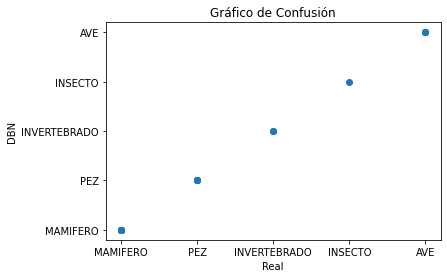

In [15]:
# ejecuta el  modelo
Y_pred = classifier.predict(X_test)

# calcula la exactitud
print('\nExactitud: %f' % accuracy_score(Y_test, Y_pred))

# muestra resultados de la predicción
classPreds = []
classReal = []
cantOK = 0
cantError = 0
print("\n Resultados: ")
for pred_class_id, expec in zip(Y_pred, Y_test):
    
    classPreds.append(CLASSES[pred_class_id])
    classReal.append(CLASSES[expec])

    if (pred_class_id == expec): 
      res = ""
      cantOK += 1
    else: 
      res = "!"
      cantError += 1

    print('Clase predecida es "{}"[{}], la correcta es "{}"[{}]{} '.format(
        CLASSES[pred_class_id], pred_class_id, CLASSES[expec], expec, res))

print('=== Total Ejemplos: {}, con {} predicciones ok y {} errores.'.format(cantOK+cantError, cantOK, cantError))

# gráfico de comparación
plt.title('Gráfico de Confusión')
plt.xlabel('Real')
plt.ylabel('DBN')
plt.scatter(classReal, classPreds)

# muestra reporte de clasificación
print("\n Reporte de Clasificación: ")
print(classification_report(classReal, classPreds))

# muestra matriz de confusion
print('\nMatriz de Confusión: ')
cm = confusion_matrix(classReal, classPreds, labels=CLASSES)
cmtx = pd.DataFrame(
    cm, 
    index=['r:{:}'.format(x) for x in CLASSES], 
    columns=['p:{:}'.format(x) for x in CLASSES]
  )
print(cmtx)
print("\n")
